In [1]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

2024-07-19 09:32:14.957518: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 09:32:14.957624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 09:32:15.077783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data_gen = ImageDataGenerator(rescale=1/255,
                          zoom_range=0.2,
                          shear_range=0.2,
                          validation_split=0.2,
)

In [3]:
path = r'/kaggle/input/pins-face-recognition/105_classes_pins_dataset'
train_data = data_gen.flow_from_directory(
    path,
    target_size=(160, 160),
    batch_size = 100,
    subset='training',
    class_mode = 'categorical'
)

Found 14071 images belonging to 105 classes.


In [4]:
train_data.class_indices

{'pins_Adriana Lima': 0,
 'pins_Alex Lawther': 1,
 'pins_Alexandra Daddario': 2,
 'pins_Alvaro Morte': 3,
 'pins_Amanda Crew': 4,
 'pins_Andy Samberg': 5,
 'pins_Anne Hathaway': 6,
 'pins_Anthony Mackie': 7,
 'pins_Avril Lavigne': 8,
 'pins_Ben Affleck': 9,
 'pins_Bill Gates': 10,
 'pins_Bobby Morley': 11,
 'pins_Brenton Thwaites': 12,
 'pins_Brian J. Smith': 13,
 'pins_Brie Larson': 14,
 'pins_Chris Evans': 15,
 'pins_Chris Hemsworth': 16,
 'pins_Chris Pratt': 17,
 'pins_Christian Bale': 18,
 'pins_Cristiano Ronaldo': 19,
 'pins_Danielle Panabaker': 20,
 'pins_Dominic Purcell': 21,
 'pins_Dwayne Johnson': 22,
 'pins_Eliza Taylor': 23,
 'pins_Elizabeth Lail': 24,
 'pins_Emilia Clarke': 25,
 'pins_Emma Stone': 26,
 'pins_Emma Watson': 27,
 'pins_Gwyneth Paltrow': 28,
 'pins_Henry Cavil': 29,
 'pins_Hugh Jackman': 30,
 'pins_Inbar Lavi': 31,
 'pins_Irina Shayk': 32,
 'pins_Jake Mcdorman': 33,
 'pins_Jason Momoa': 34,
 'pins_Jennifer Lawrence': 35,
 'pins_Jeremy Renner': 36,
 'pins_Jessic

In [5]:
path = r'/kaggle/input/pins-face-recognition/105_classes_pins_dataset'
valid_data = data_gen.flow_from_directory(
    path,
    target_size=(160, 160),
    batch_size = 100,
    subset='validation',
    class_mode = 'categorical'
)

Found 3463 images belonging to 105 classes.


In [6]:
names = []
for k,v in train_data.class_indices.items():
    k = str(k).split('_')
    k = ' '.join(k)
    k = k.title()
    names.append(k)
print(names)

['Pins Adriana Lima', 'Pins Alex Lawther', 'Pins Alexandra Daddario', 'Pins Alvaro Morte', 'Pins Amanda Crew', 'Pins Andy Samberg', 'Pins Anne Hathaway', 'Pins Anthony Mackie', 'Pins Avril Lavigne', 'Pins Ben Affleck', 'Pins Bill Gates', 'Pins Bobby Morley', 'Pins Brenton Thwaites', 'Pins Brian J. Smith', 'Pins Brie Larson', 'Pins Chris Evans', 'Pins Chris Hemsworth', 'Pins Chris Pratt', 'Pins Christian Bale', 'Pins Cristiano Ronaldo', 'Pins Danielle Panabaker', 'Pins Dominic Purcell', 'Pins Dwayne Johnson', 'Pins Eliza Taylor', 'Pins Elizabeth Lail', 'Pins Emilia Clarke', 'Pins Emma Stone', 'Pins Emma Watson', 'Pins Gwyneth Paltrow', 'Pins Henry Cavil', 'Pins Hugh Jackman', 'Pins Inbar Lavi', 'Pins Irina Shayk', 'Pins Jake Mcdorman', 'Pins Jason Momoa', 'Pins Jennifer Lawrence', 'Pins Jeremy Renner', 'Pins Jessica Barden', 'Pins Jimmy Fallon', 'Pins Johnny Depp', 'Pins Josh Radnor', 'Pins Katharine Mcphee', 'Pins Katherine Langford', 'Pins Keanu Reeves', 'Pins Krysten Ritter', 'Pins L

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu',input_shape=(160,160,3)),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2),

    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2),

    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2),


    keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=3, strides=2),


    keras.layers.Conv2D(filters=1024, kernel_size=2, activation='relu'),
    keras.layers.AveragePooling2D(pool_size=2, strides=1),

    keras.layers.Flatten(),

    keras.layers.Dense(units=128, activation='tanh'),

    keras.layers.Dense(units=105, activation='softmax')

])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 156, 156, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 77, 77, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 73, 73, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 1024)     │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 1, 1024)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 105)            │        13,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,878,185 (37.68 MB)

 Trainable params: 9,878,185 (37.68 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adamax',loss=keras.losses.CategoricalCrossentropy(),metrics=['acc'])

In [10]:
early = EarlyStopping('val_loss',patience=10)

In [11]:
hist = model.fit(train_data,epochs=60,steps_per_epoch=201,validation_data=valid_data,callbacks=[early],shuffle=True)

Epoch 1/60


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1721381610.156631      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


141/201 ━━━━━━━━━━━━━━━━━━━━ 1:12 1s/step - acc: 0.0099 - loss: 4.6718

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


201/201 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - acc: 0.0099 - loss: 4.6648 - val_acc: 0.0130 - val_loss: 4.6232
Epoch 2/60
201/201 ━━━━━━━━━━━━━━━━━━━━ 111s 529ms/step - acc: 0.0142 - loss: 4.6113 - val_acc: 0.0240 - val_loss: 4.5568
Epoch 3/60
201/201 ━━━━━━━━━━━━━━━━━━━━ 115s 545ms/step - acc: 0.0287 - loss: 4.4444 - val_acc: 0.0491 - val_loss: 4.2853
Epoch 4/60
201/201 ━━━━━━━━━━━━━━━━━━━━ 111s 531ms/step - acc: 0.0688 - loss: 4.1071 - val_acc: 0.0811 - val_loss: 3.9965
Epoch 5/60
201/201 ━━━━━━━━━━━━━━━━━━━━ 114s 541ms/step - acc: 0.1099 - loss: 3.7511 - val_acc: 0.1100 - val_loss: 3.7759
Epoch 6/60
201/201 ━━━━━━━━━━━━━━━━━━━━ 113s 541ms/step - acc: 0.1708 - loss: 3.4172 - val_acc: 0.1681 - val_loss: 3.4660
Epoch 7/60
201/201 ━━━━━━━━━━━━━━━━━━━━ 113s 539ms/step - acc: 0.2343 - loss: 3.1190 - val_acc: 0.2186 - val_loss: 3.2308
Epoch 8/60
201/201 ━━━━━━━━━━━━━━━━━━━━ 113s 538ms/step - acc: 0.3027 - loss: 2.8325 - val_acc: 0.2662 - val_loss: 2.9717
Epoch 9/60
201/201 ━━━━━━━━━━━━━━━━━━━

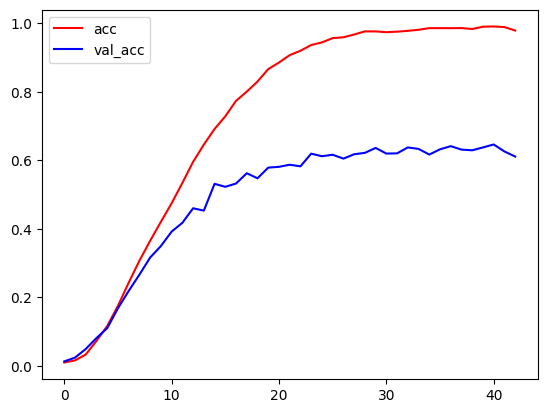

In [12]:
plt.plot(hist.history['acc'],color='r')
plt.plot(hist.history['val_acc'],color='b')
plt.legend(['acc','val_acc'])
plt.show()

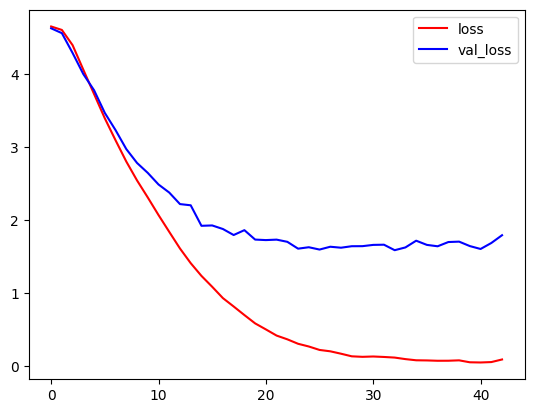

In [13]:
plt.plot(hist.history['loss'],color='r')
plt.plot(hist.history['val_loss'],color='b')
plt.legend(['loss','val_loss'])
plt.show()

In [14]:
model.save('model.h5')